<h2 style="font-family: 'Times New Roman', sans-serif; color: #2e6c80;">"Goal-Driven Analytics : Leveraging ML and High-Performance Computing for Predicting Football League Scores"</h2>

<h3 style="font-family: 'Times New Roman', sans-serif; color: #2e6c80;">Data Preprocessing, Cleaning, and Analysis Framework</h3>
<ol>
    <li><b>Load the CSV file</b> and convert it into a DataFrame.</li>
    <li><b>Inspect the DataFrame</b> to understand its structure and contents.</li>
    <li><b>Select the desired columns</b> of interest for further analysis.</li>
    <li><b>Understand the numerical, categorical, and binary variables</b> to inform preprocessing strategies.</li>
    <li><b>Examine duplicate entries, null values, missing values, and extreme values</b> to assess data quality.</li>
    <li><b>Remove, Replace, or Impute</b> (Mean, Median, or Mode) as required to address data quality issues.</li>
    <li><b>Write the cleaned DataFrame</b> into a new CSV file for persistence.</li>
    <li><b>Repeat the process [1 - 7]</b> for all selected CSV files to ensure consistency in data quality.</li>
    <li><b>Merging the CSV files</b> through a systematic process, identifying primary keys of interest.</li>
    <li><b>Write the master dataset</b> into a new CSV file and name it <i>master_df</i>.</li>
    <li><b>Repeat the process [4 - 7]</b> for the master DataFrame to ensure it is also clean and consistent.</li>
    <li><b>Write the master DataFrame</b> into a new CSV file and name it <i>master_cleaned</i>.</li>
</ol>

###### 1 -- GAMES DATA FRAME [games.csv]

###### 1.1 Load the required libraries and csv files

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

games_data = pd.read_csv("../1. Input/games.csv")
games_data.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league


###### 1.2 Data Type Inspection 

In [2]:
games_data.dtypes

game_id                     int64
competition_id             object
season                      int64
round                      object
date                       object
home_club_id                int64
away_club_id                int64
home_club_goals             int64
away_club_goals             int64
home_club_position        float64
away_club_position        float64
home_club_manager_name     object
away_club_manager_name     object
stadium                    object
attendance                float64
referee                    object
url                        object
home_club_formation        object
away_club_formation        object
home_club_name             object
away_club_name             object
aggregate                  object
competition_type           object
dtype: object

###### 1.3 Descriptive Statistics 

In [3]:
#display(games_data.describe(include = "all"))
display(games_data.nunique())

game_id                   66296
competition_id               43
season                       12
round                       116
date                       3458
home_club_id               2413
away_club_id               2134
home_club_goals              16
away_club_goals              18
home_club_position           21
away_club_position           21
home_club_manager_name     4865
away_club_manager_name     4592
stadium                    2299
attendance                27492
referee                    2369
url                       66296
home_club_formation          51
away_club_formation          65
home_club_name              426
away_club_name              426
aggregate                   113
competition_type              4
dtype: int64

<span style="font-size: smaller;">**VARIABLE DESCRIPTION** -- SUMMARY</span>  
<span style="font-size: smaller;">**game_id**: Identifies each of the 66,296 unique games.</span>  
<span style="font-size: smaller;">**competition_id**: Represents 43 distinct competitions.</span>  
<span style="font-size: smaller;">**season**: Covers 12 unique seasons of play.</span>  
<span style="font-size: smaller;">**round**: Includes 116 different rounds or stages.</span>  
<span style="font-size: smaller;">**home_club_id**: Features 2,413 unique home clubs.</span>  
<span style="font-size: smaller;">**away_club_id**: Lists 2,134 distinct away clubs.</span>  
<span style="font-size: smaller;">**home_club_position**: Shows 21 unique positions for home clubs.</span>  
<span style="font-size: smaller;">**away_club_position**: Shows 21 unique positions for away clubs.</span>  
<span style="font-size: smaller;">**home_club_manager_name**: Names 4,865 different home club managers.</span>  
<span style="font-size: smaller;">**away_club_manager_name**: Names 4,592 different away club managers.</span>  
<span style="font-size: smaller;">**stadium**: Covers 2,299 unique stadiums where games are held.</span>  
<span style="font-size: smaller;">**referee**: Includes 2,369 unique referees who officiated the games.</span>  
<span style="font-size: smaller;">**url**: Provides 66,296 unique URLs for accessing detailed game information.</span>  
<span style="font-size: smaller;">**home_club_formation**: Details 51 different formations used by home clubs.</span>  
<span style="font-size: smaller;">**away_club_formation**: Details 65 different formations used by away clubs.</span>  
<span style="font-size: smaller;">**home_club_name**: Contains 426 unique names of home clubs.</span>  
<span style="font-size: smaller;">**away_club_name**: Contains 426 unique names of away clubs.</span>  
<span style="font-size: smaller;">**competition_type**: Differentiates between 4 types of competitions.</span>

###### 1.4 Select variables from games data frame and save it as games_df 

In [4]:
games_df = games_data[["game_id","competition_id","season","date","home_club_id","away_club_id","home_club_goals","away_club_goals","home_club_position","away_club_position","stadium","attendance","home_club_formation","away_club_formation","home_club_name","away_club_name","competition_type"]]
display(games_df.head())
print("The total number of observations/columns :",games_df.shape) # (66296, 17)

,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_formation,away_club_formation,home_club_name,away_club_name,competition_type
0,2321044,L1,2013,2013-08-18,16,23,2,1,1.0,15.0,SIGNAL IDUNA PARK,80200.0,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,domestic_league
1,2321060,L1,2013,2013-08-25,23,24,0,2,18.0,11.0,EINTRACHT-Stadion,23325.0,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,domestic_league
2,2321086,L1,2013,2013-09-21,4,16,1,1,15.0,1.0,Max-Morlock-Stadion,50000.0,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,domestic_league
3,2321152,L1,2013,2013-11-02,44,33,0,2,7.0,6.0,Olympiastadion Berlin,69277.0,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,domestic_league
4,2321205,L1,2013,2013-12-21,41,39,2,3,14.0,9.0,Volksparkstadion,50000.0,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,domestic_league


The total number of observations/columns : (66296, 17)


###### 1.5 Understand the Numerical, Categorical and Binary Variables

In [5]:
# Create lists to hold the names of each type of column
numerical_variables = []
categorical_variables = []
binary_variables = []

# Loop through the games_df columns to classify them
for column_name in games_df.columns:
    unique_vals = games_df[column_name].nunique()
    
    # Check for Binary
    if (games_df[column_name].dtype in ['int64', 'float64', 'bool']) and (unique_vals == 2):
        binary_variables.append(column_name)
    # Check for Numerical
    elif games_df[column_name].dtype in ['int64', 'float64']:
        numerical_variables.append(column_name)
    # Check for Categorical
    elif games_df[column_name].dtype == 'object' or games_df[column_name].dtype.name == 'category':
        categorical_variables.append(column_name)

print("Numerical Variables:", numerical_variables)
print("Categorical Variables:", categorical_variables)
print("Binary Variables:", binary_variables)

print("Total Number Of Numerical Variables: ",len(numerical_variables))
print("Total Number Of Categorical Variables: ",len(categorical_variables))
print("Total Number Of Binary Variables: ",len(binary_variables))

Numerical Variables: ['game_id', 'season', 'home_club_id', 'away_club_id', 'home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position', 'attendance']
Categorical Variables: ['competition_id', 'date', 'stadium', 'home_club_formation', 'away_club_formation', 'home_club_name', 'away_club_name', 'competition_type']
Binary Variables: []
Total Number Of Numerical Variables:  9
Total Number Of Categorical Variables:  8
Total Number Of Binary Variables:  0


###### 1.6 Inspect Numerical Variables 

In [6]:
games_df[numerical_variables].head()

,game_id,season,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,attendance
0,2321044,2013,16,23,2,1,1.0,15.0,80200.0
1,2321060,2013,23,24,0,2,18.0,11.0,23325.0
2,2321086,2013,4,16,1,1,15.0,1.0,50000.0
3,2321152,2013,44,33,0,2,7.0,6.0,69277.0
4,2321205,2013,41,39,2,3,14.0,9.0,50000.0


###### 1.7 Structure of Numerical Variables

In [7]:
games_df[numerical_variables].describe(include = "all")
display(games_df[numerical_variables].dtypes)
display(games_df[numerical_variables].info())
display(games_df[numerical_variables].nunique())

game_id                 int64
season                  int64
home_club_id            int64
away_club_id            int64
home_club_goals         int64
away_club_goals         int64
home_club_position    float64
away_club_position    float64
attendance            float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66296 entries, 0 to 66295
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_id             66296 non-null  int64  
 1   season              66296 non-null  int64  
 2   home_club_id        66296 non-null  int64  
 3   away_club_id        66296 non-null  int64  
 4   home_club_goals     66296 non-null  int64  
 5   away_club_goals     66296 non-null  int64  
 6   home_club_position  46546 non-null  float64
 7   away_club_position  46546 non-null  float64
 8   attendance          56615 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 4.6 MB


None

game_id               66296
season                   12
home_club_id           2413
away_club_id           2134
home_club_goals          16
away_club_goals          18
home_club_position       21
away_club_position       21
attendance            27492
dtype: int64

###### 1.8 Check Duplicate Values of Games Data Frame whether it adheres to Data Standards

In [8]:
games_df_duplicates = games_df.duplicated().sum()
print(games_df_duplicates) # No duplicate entries found

0


###### 1.9 Subset the games data frame where the data caters only for Domestic League Competitions

In [9]:
#display(games_df["competition_type"].unique()) # Returns the different competition types
games_df = games_df[games_df["competition_type"] == "domestic_league"]
display(games_df.head())
display(games_df.shape) # (46552, 17)

,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_formation,away_club_formation,home_club_name,away_club_name,competition_type
0,2321044,L1,2013,2013-08-18,16,23,2,1,1.0,15.0,SIGNAL IDUNA PARK,80200.0,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,domestic_league
1,2321060,L1,2013,2013-08-25,23,24,0,2,18.0,11.0,EINTRACHT-Stadion,23325.0,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,domestic_league
2,2321086,L1,2013,2013-09-21,4,16,1,1,15.0,1.0,Max-Morlock-Stadion,50000.0,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,domestic_league
3,2321152,L1,2013,2013-11-02,44,33,0,2,7.0,6.0,Olympiastadion Berlin,69277.0,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,domestic_league
4,2321205,L1,2013,2013-12-21,41,39,2,3,14.0,9.0,Volksparkstadion,50000.0,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,domestic_league


(46552, 17)

###### 1.10 Inspect Null Values for Numerical Variables

In [10]:
numerical_nulls = games_df[numerical_variables].isnull().sum()
numerical_nulls
# home_club_position       6
# away_club_position       6
# attendance            5678 [Needs further inspection]

game_id                  0
season                   0
home_club_id             0
away_club_id             0
home_club_goals          0
away_club_goals          0
home_club_position       6
away_club_position       6
attendance            5678
dtype: int64

###### 1.11 Inspect the Attendance Variable

In [11]:
games_df["attendance"].describe()

count    40874.000000
mean     19678.569726
std      17598.554404
min         23.000000
25%       5976.000000
50%      14413.500000
75%      28301.000000
max      99354.000000
Name: attendance, dtype: float64

###### 1.12 Address Null Values for Attendance Variable

In [12]:
attendance_null_val = games_df[games_df["attendance"].isnull()] # Inspect the df for null values
#display(attendance_null_val)
display(attendance_null_val.shape) # (5678, 17)

# Inspect the null values attendance for season 2020
attendance_2020_null = games_df[(games_df["season"] == 2020) & (games_df["attendance"].isnull())]
#display(attendance_2020_null)
display(attendance_2020_null.shape) # (3489, 17)
# Through inspection it is clear that the null values for attendance predominantly lies as a result
# of Covid-19 pandemic.

(5678, 17)

(3489, 17)

###### 1.13 Conditional Replacement and Mean Imputation For Addressing Null Values in Attendance Variable

In [13]:
# To address the null values during Covid-19 pandemic, replace the null values with zero.
# For the remaining null values, impute the attendance column with the mean by competition_id. 

games_df.loc[games_df["season"] == 2020,"attendance"] = games_df.loc[games_df["season"] == 2020,"attendance"].fillna(value=0)
#games_df['attendance'].isnull().sum() # 2189 Imputed the null values successfully 

attendance_by_competition = games_df.groupby('competition_id')['attendance'].transform('mean')
#display(attendance_by_competition)

# Impute the mean of attendance by competition_id
games_df['attendance'] = games_df['attendance'].fillna(attendance_by_competition)
games_df['attendance'].isnull().sum() # Imputed the null values successfully

0

###### 1.14 Inspect the Home Club Position and Away Club Position Variable

In [14]:
# Inspect the games data frame before the variable of interest
display(games_df.shape)# No rows or columns have been removed after the last imputation (46552, 17)
home_club_position_nulls = games_df[games_df["home_club_position"].isnull()] # Inspect the data frame
# display(home_club_position_nulls.shape) # (6, 17)
away_club_position_nulls = games_df[games_df["away_club_position"].isnull()] # Inspect the data frame
#display(away_club_position_nulls) # (6, 17) 
# Basically the null values are common for both home and away club positions.

# Mode of Action : Drop the rows for home or away club positions to eliminate null values
games_df.dropna(subset=['home_club_position'],inplace=True)
# Check the null values for the numerical variables after rows have been dropped
print(games_df[numerical_variables].isnull().sum())
print(games_df[numerical_variables].shape) # (46546, 9) 

# 6 null values removed
# All the null values have been taken care of, the next part is to examine the extreme values.

(46552, 17)

game_id               0
season                0
home_club_id          0
away_club_id          0
home_club_goals       0
away_club_goals       0
home_club_position    0
away_club_position    0
attendance            0
dtype: int64
(46546, 9)


###### 1.15 Extreme Value Detection for Numerical Variables 

The number of games that have attendance greater than 58,000 : 1765


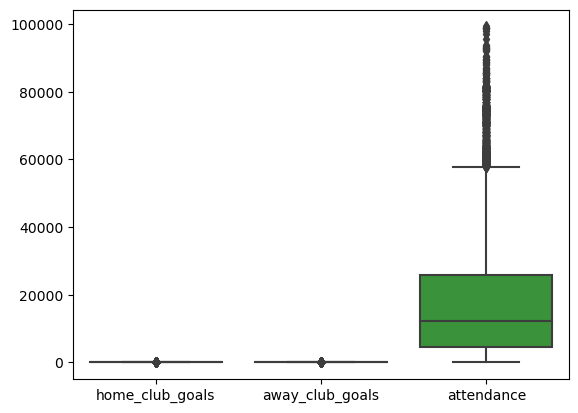

<Figure size 640x480 with 0 Axes>

In [15]:
games_df[numerical_variables].describe(include = "all")

# Inspect the home_club_goals, away_club_goals and attendance variable
sns.boxplot(data = games_df[['home_club_goals','away_club_goals','attendance']])

# Even though that there are quiet significant amount of outliers for the attendance variable [above 
# 58,000], there might be stadiums that have higher seating capacity within the stadiums.
attendance_greater_58000 = len(games_df[games_df["attendance"] > 58000])
print(f'The number of games that have attendance greater than 58,000 : {attendance_greater_58000}')
plt.show()
plt.clf()

###### 1.16 Data Type Conversion : Home Club Positions, Away Club Positions and Attendance Variable

In [16]:
# Check the data types before conversion :
display(games_df[numerical_variables].dtypes)

# Perform the conversion :
games_df["home_club_position"] = games_df["home_club_position"].astype("int64")
games_df["away_club_position"] = games_df["away_club_position"].astype("int64")
games_df["attendance"] = games_df["attendance"].astype("int64")

# Confirm the data types after conversion :
display(games_df[numerical_variables].dtypes)

game_id                 int64
season                  int64
home_club_id            int64
away_club_id            int64
home_club_goals         int64
away_club_goals         int64
home_club_position    float64
away_club_position    float64
attendance            float64
dtype: object

game_id               int64
season                int64
home_club_id          int64
away_club_id          int64
home_club_goals       int64
away_club_goals       int64
home_club_position    int64
away_club_position    int64
attendance            int64
dtype: object

###### 1.17 Examine Categorical Variables [Descriptive Statistics / Conversions] 

In [17]:
games_df[categorical_variables].describe(include = "all",datetime_is_numeric = True)
print(games_df[categorical_variables].dtypes)

# Convert the date [object/string] to the date time format
games_df['date'] = pd.to_datetime(games_df['date'])
print(games_df[categorical_variables].dtypes)

# Understanding the categorical variables through counts/frequencies
print(games_df[categorical_variables].nunique())
# 510 different stadiums
# 35 - 36 home/away club formations
# 426 home/away clubs playing in domestic league competitions

competition_id         object
date                   object
stadium                object
home_club_formation    object
away_club_formation    object
home_club_name         object
away_club_name         object
competition_type       object
dtype: object
competition_id                 object
date                   datetime64[ns]
stadium                        object
home_club_formation            object
away_club_formation            object
home_club_name                 object
away_club_name                 object
competition_type               object
dtype: object
competition_id           14
date                   2585
stadium                 510
home_club_formation      36
away_club_formation      35
home_club_name          426
away_club_name          426
competition_type          1
dtype: int64


###### 1.18 Examine Null Values Across Categorical Variables

In [18]:
display(games_df[categorical_variables].isnull().sum())

competition_id            0
date                      0
stadium                  38
home_club_formation    4162
away_club_formation    4161
home_club_name            0
away_club_name            0
competition_type          0
dtype: int64

###### 1.19 Address Null Values For Stadium Variable

In [19]:
# Conduct initial inspection where the null values have occurred
# Replace/Impute the values wherever necessary

# Major Stadiums For Domestic Leagues In Turkey and Russia For Null Value Imputation

# Beşiktaş Jimnastik Kulübü - BJK İnönü Stadium
# FK Spartak Moskva - Luzhniki Stadium 
# SC Olhanense - Estádio José Arcanjo  
# PFK CSKA Moskva - Arena Khimki 
# Elazigspor - Elazığ Atatürk

stadium_null_vals = games_df[games_df["stadium"].isnull()]

# Examining Stadium Variable
#display(stadium_null_vals["home_club_name"].unique())
#display(games_df[games_df['home_club_name'] == 'Beşiktaş Jimnastik Kulübü']['stadium'].value_counts())
#display(games_df[games_df['home_club_name'] == 'FK Spartak Moskva']['stadium'].value_counts())
#display(games_df[games_df['home_club_name'] == 'SC Olhanense']['stadium'].value_counts())
#display(games_df[games_df['home_club_name'] == 'PFK CSKA Moskva']['stadium'].value_counts())
#display(games_df[games_df['home_club_name'] == 'Elazigspor']['stadium'].value_counts())

# Cross Validation Code
#display(stadium_null_vals[(stadium_null_vals["stadium"].isnull()) & 
#                          (stadium_null_vals["home_club_name"] == "FK Spartak Moskva")])

# Step-Wise Stadium Value Imputation 
games_df.loc[(games_df["home_club_name"] == "Beşiktaş Jimnastik Kulübü") & 
             (games_df["stadium"].isnull()), "stadium"] = "BJK İnönü Stadium"
#display(games_df["stadium"].isnull().sum()) # 17 Null values replaced 21 Remaining
games_df.loc[(games_df["home_club_name"] == "FK Spartak Moskva") & 
             (games_df["stadium"].isnull()), "stadium"] = "Luzhniki Stadium"
#display(games_df["stadium"].isnull().sum()) # 13 Null values replaced 8 Remaining
games_df.loc[(games_df["home_club_name"] == "SC Olhanense") & 
             (games_df["stadium"].isnull()), "stadium"] = "Estádio José Arcanjo"
#display(games_df["stadium"].isnull().sum()) # 3 Null values replaced 5 Remaining
games_df.loc[(games_df["home_club_name"] == "PFK CSKA Moskva") & 
             (games_df["stadium"].isnull()), "stadium"] = "Arena Khimki"
#display(games_df["stadium"].isnull().sum()) # 4 Null values replaced 1 Remaining
games_df.loc[(games_df["home_club_name"] == "Elazigspor") & 
             (games_df["stadium"].isnull()), "stadium"] = "Elazığ Atatürk"
#display(games_df["stadium"].isnull().sum()) # 1 Null value replaced 0 Remaining

# Checking whether the values have been imputed successfully
display(games_df[categorical_variables].isnull().sum())

competition_id            0
date                      0
stadium                   0
home_club_formation    4162
away_club_formation    4161
home_club_name            0
away_club_name            0
competition_type          0
dtype: int64

###### 1.20 Address Null Values For Home and Away Club Formation Variable

In [20]:
# Home Club Formations

home_club_unique = games_df["home_club_formation"].unique()
display(home_club_unique)

home_club_nulls = games_df[games_df["home_club_formation"].isnull()]
display(home_club_nulls.head()) 
display(home_club_nulls.shape) # (4162, 17)

# Away Club Formations

away_club_unique = games_df["away_club_formation"].unique()
display(away_club_unique)

away_club_nulls = games_df[games_df["away_club_formation"].isnull()]
display(away_club_nulls.head()) 
display(away_club_nulls.shape) # (4161, 17)

array(['4-2-3-1', '4-3-2-1', '4-3-3 Defending', '4-3-3 Attacking',
       '4-4-2 double 6', '4-1-4-1', '4-3-1-2', '3-5-2 flat', '5-4-1',
       '4-4-1-1', '4-4-2', '3-4-2-1', '5-3-2', '3-5-2', '3-6-1',
       '4-4-2 Diamond', '4-3-3', '4-5-1', '3-4-3', nan, '5-4-1 Diamond',
       '2-5-3', '3-4-1-2', '3-5-2 Attacking', '4-5-1 flat', '3-1-4-2',
       '5-2-3', '4-1-3-2', '3-4-3 Diamond', '3-3-3-1', '4-2-4', '4-6-0',
       '6-2-2', '6-1-3', '2-4-4', '2-7-1', '3-3-4'], dtype=object)

,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_formation,away_club_formation,home_club_name,away_club_name,competition_type
235,2518602,GR1,2014,2015-02-14,7185,5572,3,0,12,18,Stadio Komotinis OPAP,4320,NaN,NaN,Panthrakikos Komotini,Niki Volou,domestic_league
579,2888455,UKR1,2017,2017-08-26,6993,338,3,0,5,2,Stadion im. Volodymyra Boyko,6103,NaN,NaN,FK Mariupol,Futbolniy Klub Dynamo Kyiv,domestic_league
679,2453109,UKR1,2013,2014-05-17,16245,6996,3,0,9,12,SK Sevastopol,6103,NaN,NaN,FK Sevastopol (- 2014),Goverla Uzhgorod (- 2016),domestic_league
951,2222597,RU1,2012,2012-08-25,3725,232,2,1,2,5,Akhmat-Arena,21700,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,domestic_league
952,2222627,RU1,2012,2012-08-20,2696,4128,0,2,11,10,Metallurg,11400,NaN,NaN,PFK Krylya Sovetov Samara,Amkar Perm,domestic_league


(4162, 17)

array(['4-3-2-1', '4-2-3-1', '4-4-2 Diamond', '4-1-4-1', '4-4-2 double 6',
       '4-3-3 Attacking', '4-3-3 Defending', '4-3-1-2', '5-3-2',
       '4-4-1-1', '3-5-2 flat', '4-3-3', '5-4-1', '4-1-3-2', '4-4-2',
       '4-5-1', nan, '3-5-2', '4-5-1 flat', '3-5-2 Attacking', '3-4-2-1',
       '3-4-1-2', '3-4-3', '4-2-4', '3-3-3-1', '5-4-1 Diamond', '3-1-4-2',
       '5-2-3', '3-4-3 Diamond', '6-1-3', '6-2-2', '3-6-1', '3-3-4',
       '5-1-4', '6-3-1', '2-6-2'], dtype=object)

,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_formation,away_club_formation,home_club_name,away_club_name,competition_type
235,2518602,GR1,2014,2015-02-14,7185,5572,3,0,12,18,Stadio Komotinis OPAP,4320,NaN,NaN,Panthrakikos Komotini,Niki Volou,domestic_league
579,2888455,UKR1,2017,2017-08-26,6993,338,3,0,5,2,Stadion im. Volodymyra Boyko,6103,NaN,NaN,FK Mariupol,Futbolniy Klub Dynamo Kyiv,domestic_league
679,2453109,UKR1,2013,2014-05-17,16245,6996,3,0,9,12,SK Sevastopol,6103,NaN,NaN,FK Sevastopol (- 2014),Goverla Uzhgorod (- 2016),domestic_league
951,2222597,RU1,2012,2012-08-25,3725,232,2,1,2,5,Akhmat-Arena,21700,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,domestic_league
952,2222627,RU1,2012,2012-08-20,2696,4128,0,2,11,10,Metallurg,11400,NaN,NaN,PFK Krylya Sovetov Samara,Amkar Perm,domestic_league


(4161, 17)

###### 1.21 Strategic Imputation and Feature Engineering For Home and Away Club Formations

In [21]:
# Procedure for Imputing Home/Away Club Null Values and Creating The Tactical Apporach Column

# Step 1 : Group the home club formation by season and home club name
# Step 2 : Compute the modes for each group
# Step 3 : Check, if the series is not empty the first mode is imputed towards missing values
# Step 4 : Else, if the series is empty then the null values are imputed
# Step 5 : Global assignment, if there are still missing values and a possible solution 
#          is to address with a global mode [overall most formation] if necessary
# Step 6 : Evaluate the misssing values for home/away club formations
# Step 7 : Define the tactical apporach by creating a dictionary for the home/away club formations
# Step 8 : Map the home/away club formation to the tactical approach and if there are null values
#          for the tactical approach, name the approach as 'unknown'
# Step 9 : Make sure that there are no null values at the end of the imputation across columns and 
#          and display the first few rows to review the final result

# Home/Away Club Formation Imputation [Steps 1 - 4]

games_df['home_club_formation'] = games_df.groupby(
    ['season','home_club_name'])['home_club_formation'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

games_df['away_club_formation'] = games_df.groupby(
    ['season','away_club_name'])['away_club_formation'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

# Home/Away Club Formation Imputation [Steps 5 - 6]

if games_df['home_club_formation'].isnull().any():
    most_common_formation = games_df['home_club_formation'].mode().iloc[0]
    games_df['home_club_formation'] = games_df['home_club_formation'].fillna(most_common_formation)
    
if games_df['away_club_formation'].isnull().any():
    most_common_formation = games_df['away_club_formation'].mode().iloc[0]
    games_df['away_club_formation'] = games_df['away_club_formation'].fillna(most_common_formation)

home_formation_null = games_df['home_club_formation'].isnull().sum()
print(f"Missing values for home club formation after imputation: {home_formation_null}")

away_formation_null = games_df['away_club_formation'].isnull().sum()
print(f"Missing values for away club formation after imputation: {away_formation_null}")

# Home/Away Club Formation Imputation [Steps 7 - 9]

home_formations = {
    '4-2-3-1': 'Balanced',
    '4-3-2-1': 'Balanced',
    '4-3-3 Defending': 'Defensive',
    '4-3-3 Attacking': 'Aggressive',
    '4-4-2 double 6': 'Balanced',
    '4-1-4-1': 'Balanced',
    '4-3-1-2': 'Balanced',
    '3-5-2 flat': 'Balanced',
    '5-4-1': 'Defensive',
    '4-4-1-1': 'Balanced',
    '4-4-2': 'Balanced',
    '3-4-2-1': 'Balanced',
    '5-3-2': 'Defensive',
    '3-5-2': 'Balanced',
    '3-6-1': 'Defensive',
    '4-4-2 Diamond': 'Balanced',
    '4-3-3': 'Balanced',
    '4-5-1': 'Defensive',
    '3-4-3': 'Aggressive',
    '5-4-1 Diamond': 'Defensive',
    '2-5-3': 'Aggressive',
    '3-4-1-2': 'Balanced',
    '3-5-2 Attacking': 'Aggressive',
    '4-5-1 flat': 'Defensive',
    '3-1-4-2': 'Balanced',
    '5-2-3': 'Aggressive',
    '4-1-3-2': 'Balanced',
    '3-4-3 Diamond': 'Aggressive',
    '3-3-3-1': 'Aggressive',
    '4-2-4': 'Aggressive',
    '4-6-0': 'Balanced',  
    '6-2-2': 'Defensive',
    '6-1-3': 'Defensive',
    '2-4-4': 'Aggressive',
    '2-7-1': 'Defensive',
    '3-3-4': 'Aggressive'
}

away_formations = {
    '4-3-2-1': 'Balanced',
    '4-2-3-1': 'Balanced',
    '4-4-2 Diamond': 'Balanced',
    '4-1-4-1': 'Balanced',
    '4-4-2 double 6': 'Balanced',
    '4-3-3 Attacking': 'Aggressive',
    '4-3-3 Defending': 'Defensive',
    '4-3-1-2': 'Balanced',
    '5-3-2': 'Defensive',
    '4-4-1-1': 'Balanced',
    '3-5-2 flat': 'Balanced',
    '4-3-3': 'Balanced',
    '5-4-1': 'Defensive',
    '4-1-3-2': 'Balanced',
    '4-4-2': 'Balanced',
    '4-5-1': 'Defensive',
    '3-5-2': 'Balanced',
    '4-5-1 flat': 'Defensive',
    '3-5-2 Attacking': 'Aggressive',
    '3-4-2-1': 'Balanced',
    '3-4-1-2': 'Balanced',
    '3-4-3': 'Aggressive',
    '4-2-4': 'Aggressive',
    '3-3-3-1': 'Aggressive',
    '5-4-1 Diamond': 'Defensive',
    '3-1-4-2': 'Balanced',
    '5-2-3': 'Aggressive',
    '3-4-3 Diamond': 'Aggressive',
    '6-1-3': 'Defensive',
    '6-2-2': 'Defensive',
    '3-6-1': 'Defensive',
    '3-3-4': 'Aggressive',
    '5-1-4': 'Defensive',  
    '6-3-1': 'Defensive',  
    '2-6-2': 'Balanced'  
}

games_df['home_club_strategy'] = games_df['home_club_formation'].map(
    home_formations).fillna('Unknown')
games_df['away_club_strategy'] = games_df['away_club_formation'].map(
    away_formations).fillna('Unknown')

display(games_df.head())
display(games_df['home_club_strategy'].value_counts())
display(games_df['away_club_strategy'].value_counts())

Missing values for home club formation after imputation: 0
Missing values for away club formation after imputation: 0


,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_formation,away_club_formation,home_club_name,away_club_name,competition_type,home_club_strategy,away_club_strategy
0,2321044,L1,2013,2013-08-18,16,23,2,1,1,15,SIGNAL IDUNA PARK,80200,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,domestic_league,Balanced,Balanced
1,2321060,L1,2013,2013-08-25,23,24,0,2,18,11,EINTRACHT-Stadion,23325,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,domestic_league,Balanced,Balanced
2,2321086,L1,2013,2013-09-21,4,16,1,1,15,1,Max-Morlock-Stadion,50000,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,domestic_league,Balanced,Balanced
3,2321152,L1,2013,2013-11-02,44,33,0,2,7,6,Olympiastadion Berlin,69277,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,domestic_league,Balanced,Balanced
4,2321205,L1,2013,2013-12-21,41,39,2,3,14,9,Volksparkstadion,50000,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,domestic_league,Balanced,Balanced


Balanced      34068
Aggressive     8072
Defensive      4406
Name: home_club_strategy, dtype: int64

Balanced      33758
Aggressive     7947
Defensive      4841
Name: away_club_strategy, dtype: int64

###### 1.22 Inspect the Cleaned Games Data Frame 

In [22]:
display(games_df.isnull().sum()) # No null values reported
display(games_df.shape) # (46546, 19)
#display(games_df.describe(include = "all"))
display(games_df.head()) # Final review of the games_df [data frame]

game_id                0
competition_id         0
season                 0
date                   0
home_club_id           0
away_club_id           0
home_club_goals        0
away_club_goals        0
home_club_position     0
away_club_position     0
stadium                0
attendance             0
home_club_formation    0
away_club_formation    0
home_club_name         0
away_club_name         0
competition_type       0
home_club_strategy     0
away_club_strategy     0
dtype: int64

(46546, 19)

,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_formation,away_club_formation,home_club_name,away_club_name,competition_type,home_club_strategy,away_club_strategy
0,2321044,L1,2013,2013-08-18,16,23,2,1,1,15,SIGNAL IDUNA PARK,80200,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,domestic_league,Balanced,Balanced
1,2321060,L1,2013,2013-08-25,23,24,0,2,18,11,EINTRACHT-Stadion,23325,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,domestic_league,Balanced,Balanced
2,2321086,L1,2013,2013-09-21,4,16,1,1,15,1,Max-Morlock-Stadion,50000,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,domestic_league,Balanced,Balanced
3,2321152,L1,2013,2013-11-02,44,33,0,2,7,6,Olympiastadion Berlin,69277,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,domestic_league,Balanced,Balanced
4,2321205,L1,2013,2013-12-21,41,39,2,3,14,9,Volksparkstadion,50000,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,domestic_league,Balanced,Balanced


###### 2 -- CLUBS DATA FRAME [clubs.csv]

###### 2.1 Load the clubs csv file and convert it into a data frame 

In [23]:
clubs_data = pd.read_csv("../1. Input/clubs.csv")
display(clubs_data.head())
display(clubs_data.columns)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.3,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,27,27.5,15,55.6,7,Yekaterinburg Arena,23000,€-770k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,30,27.3,14,46.7,12,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,27,26.6,18,66.7,17,Olimpico di Roma,73261,+€72.25m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,28,25.5,22,78.6,21,Tottenham Hotspur Stadium,62850,€-154.90m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


Index(['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season',
       'filename', 'url'],
      dtype='object')

###### 2.2 Inspect the Data Frame

In [24]:
display(clubs_data.shape) # (426, 17)
#display(clubs_data.dtypes)
display(clubs_data.nunique())
# 426 unique clubs
# 409 stadiums

(426, 17)

club_id                    426
club_code                  426
name                       426
domestic_competition_id     14
total_market_value           0
squad_size                  31
average_age                 70
foreigners_number           29
foreigners_percentage      170
national_team_players       22
stadium_name               409
stadium_seats              380
net_transfer_record        276
coach_name                   0
last_season                 12
filename                    12
url                        426
dtype: int64

###### 2.3 Descriptive Statistics

In [25]:
display(clubs_data.describe(include = "all"))

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
count,426.000000,426,426,426,0.0,426.000000,388.000000,426.000000,379.000000,426.000000,426,426.000000,426,0.0,426.000000,426,426
unique,NaN,426,426,14,NaN,NaN,NaN,NaN,NaN,NaN,409,NaN,276,NaN,NaN,12,426
top,NaN,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,TR1,NaN,NaN,NaN,NaN,NaN,NaN,Panthessaliko Stadio,NaN,+-0,NaN,NaN,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
freq,NaN,1,1,40,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,113,NaN,NaN,238,1
mean,5314.525822,NaN,NaN,NaN,NaN,24.384977,25.428866,11.009390,45.308971,4.739437,NaN,24307.868545,NaN,NaN,2020.830986,NaN,NaN
std,11752.013818,NaN,NaN,NaN,NaN,8.815610,1.525694,6.719237,19.780345,4.997429,NaN,17136.239606,NaN,NaN,3.207283,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,0.000000,18.300000,0.000000,2.400000,0.000000,NaN,1312.000000,NaN,NaN,2012.000000,NaN,NaN
25%,421.000000,NaN,NaN,NaN,NaN,25.000000,24.400000,6.000000,31.150000,1.000000,NaN,11024.500000,NaN,NaN,2019.000000,NaN,NaN
50%,1139.500000,NaN,NaN,NaN,NaN,27.000000,25.450000,12.000000,46.700000,3.000000,NaN,20046.000000,NaN,NaN,2023.000000,NaN,NaN
75%,3415.750000,NaN,NaN,NaN,NaN,29.000000,26.400000,16.000000,58.600000,7.000000,NaN,32798.000000,NaN,NaN,2023.000000,NaN,NaN


###### 2.4 Select the desired variables from the clubs data frame and save it as clubs_df

In [26]:
clubs_df = clubs_data[["club_id","domestic_competition_id","average_age","stadium_seats","net_transfer_record"]]
display(clubs_df.head())
display(clubs_df.shape) # (426, 5) 

,club_id,domestic_competition_id,average_age,stadium_seats,net_transfer_record
0,105,L1,26.3,17810,€-1.48m
1,11127,RU1,27.5,23000,€-770k
2,114,TR1,27.3,42590,€-14.50m
3,12,IT1,26.6,73261,+€72.25m
4,148,GB1,25.5,62850,€-154.90m


(426, 5)

###### 2.5 Understand the Numerical, Categorical and Binary Variables 

In [27]:
# Create lists to hold the names of each type of column
numerical_variables = []
categorical_variables = []
binary_variables = []

# Loop through the games_df columns to classify them
for column_name in clubs_df.columns:
    unique_vals = clubs_df[column_name].nunique()
    
    # Check for Binary
    if (clubs_df[column_name].dtype in ['int64', 'float64', 'bool']) and (unique_vals == 2):
        binary_variables.append(column_name)
    # Check for Numerical
    elif clubs_df[column_name].dtype in ['int64', 'float64']:
        numerical_variables.append(column_name)
    # Check for Categorical
    elif clubs_df[column_name].dtype == 'object' or clubs_df[column_name].dtype.name == 'category':
        categorical_variables.append(column_name)

print("Numerical Variables:", numerical_variables)
print("Categorical Variables:", categorical_variables)
print("Binary Variables:", binary_variables)

print("Total Numerical Variables: ",len(numerical_variables))
print("Total Categorical Variables: ",len(categorical_variables))
print("Total Binary Variables: ",len(binary_variables))

Numerical Variables: ['club_id', 'average_age', 'stadium_seats']
Categorical Variables: ['domestic_competition_id', 'net_transfer_record']
Binary Variables: []
Total Numerical Variables:  3
Total Categorical Variables:  2
Total Binary Variables:  0


###### 2.6 Inspect Numerical Variables  and Address Null Values

In [28]:
display(clubs_df[numerical_variables].dtypes) # Data types checked
display(clubs_df[numerical_variables].isnull().sum())
# average_age      38 [Needs Further Inspection]

# Average Age Variable 
average_age_null = clubs_df[clubs_df["average_age"].isnull()]
#display(average_age_null.head())

# Mode Of Action : Mean Imputation By Domestic Competition ID
# Reason : Imputation/Interpolation/Extrapolation might not be the best feasible measure, however
# by subsetting the rows, it would remove 38 rows from the initial master data frame which might
# potentially cause an effect on the overall analysis.

#display(clubs_df.shape) # (426, 5)
average_age_competition_id = clubs_df.groupby('domestic_competition_id')['average_age'].transform('mean')
#display(average_age_competition_id)
clubs_df['average_age'] = clubs_df['average_age'].fillna(average_age_competition_id)
#display(clubs_df.shape) # (426, 5)

# Check to confirm that there are no null values present within numerical variables
display(clubs_df[numerical_variables].isnull().sum())

club_id            int64
average_age      float64
stadium_seats      int64
dtype: object

club_id           0
average_age      38
stadium_seats     0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\900421279.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubs_df['average_age'] = clubs_df['average_age'].fillna(average_age_competition_id)


club_id          0
average_age      0
stadium_seats    0
dtype: int64

###### 2.7 Inspect Numerical Variables and Extreme Values

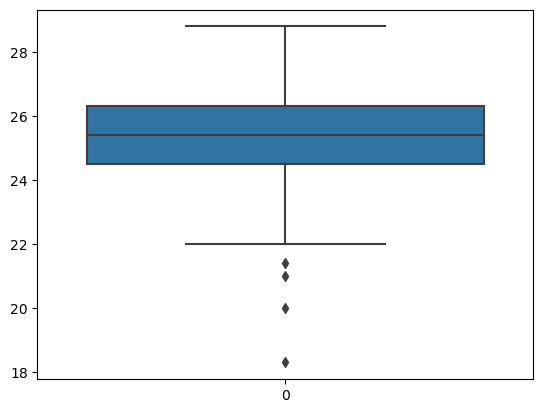

The number of outliers in average age variable:  16


<Figure size 640x480 with 0 Axes>

In [29]:
# Check for extreme values in average_age
sns.boxplot(data = clubs_df['average_age'])
plt.show()
plt.clf()

# Examining outliers for average_age less than 23 [Young Players]
average_age_outlier = clubs_df[(clubs_df["average_age"] < 23)]
#display(average_age_outlier)
print("The number of outliers in average age variable: ",len(average_age_outlier))
# These are young players that range between 18 and 22 and does not need to be removed.

###### 2.8 Inspect Categorical Variables and Address Null Values

In [30]:
display(clubs_df[categorical_variables].head())
display(clubs_df[categorical_variables].describe(include = "all"))
display(clubs_df[categorical_variables].dtypes) 
# The net transfer record needs to be converted into float64 and requires adequate feature engineering
# for extracting the required information.
display(clubs_df[categorical_variables].isnull().sum()) # No null values reported 
# Final observations/columns for the clubs data frame
display(clubs_df.shape) # (426, 5)

,domestic_competition_id,net_transfer_record
0,L1,€-1.48m
1,RU1,€-770k
2,TR1,€-14.50m
3,IT1,+€72.25m
4,GB1,€-154.90m


,domestic_competition_id,net_transfer_record
count,426,426
unique,14,276
top,TR1,+-0
freq,40,113


domestic_competition_id    object
net_transfer_record        object
dtype: object

domestic_competition_id    0
net_transfer_record        0
dtype: int64

(426, 5)

###### 2.9 Feature Engineering for Net Transfer Record [Convert the string / object into float64]

In [31]:
display(clubs_df["net_transfer_record"].nunique()) # 275 unique values
#display(clubs_df["net_transfer_record"].unique())
display(clubs_df.head())
clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].str.replace('€', '').str.replace('m', 'e6').str.replace('k', 'e3')
clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].apply(lambda x: '0' if x == '+-0' else x)
clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].astype("float64")
display(clubs_df.dtypes) # Successfully completed the object/string to float64 conversion
display(clubs_df.head()) 

276

,club_id,domestic_competition_id,average_age,stadium_seats,net_transfer_record
0,105,L1,26.3,17810,€-1.48m
1,11127,RU1,27.5,23000,€-770k
2,114,TR1,27.3,42590,€-14.50m
3,12,IT1,26.6,73261,+€72.25m
4,148,GB1,25.5,62850,€-154.90m


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\2554671223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].str.replace('€', '').str.replace('m', 'e6').str.replace('k', 'e3')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\2554671223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].apply(lambda x: '0' if x == '+-0' else x)
C:\Users\Lenovo\AppData\Local\Temp\ipykerne

club_id                      int64
domestic_competition_id     object
average_age                float64
stadium_seats                int64
net_transfer_record        float64
dtype: object

,club_id,domestic_competition_id,average_age,stadium_seats,net_transfer_record
0,105,L1,26.3,17810,-1480000.0
1,11127,RU1,27.5,23000,-770000.0
2,114,TR1,27.3,42590,-14500000.0
3,12,IT1,26.6,73261,72250000.0
4,148,GB1,25.5,62850,-154900000.0


###### 2.10 Inspect the Cleaned Clubs Data Frame

In [32]:
display(clubs_df.head())
#display(clubs_df.describe(include = "all"))
#display(clubs_df.dtypes)
display(clubs_df.isnull().sum())
display(clubs_df.shape) # (426, 5)

,club_id,domestic_competition_id,average_age,stadium_seats,net_transfer_record
0,105,L1,26.3,17810,-1480000.0
1,11127,RU1,27.5,23000,-770000.0
2,114,TR1,27.3,42590,-14500000.0
3,12,IT1,26.6,73261,72250000.0
4,148,GB1,25.5,62850,-154900000.0


club_id                    0
domestic_competition_id    0
average_age                0
stadium_seats              0
net_transfer_record        0
dtype: int64

(426, 5)

###### 3 -- COMPETITIONS DATA FRAME [competitions.csv]

###### 3.1 Load the competitions csv file and convert it into a data frame

In [33]:
competitions_data = pd.read_csv('../1. Input/competitions.csv')
display(competitions_data.head())

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...


###### 3.2 Inspect the Data Frame

In [34]:
display(competitions_data.shape) # (43, 10)
#display(competitions_data.dtypes)
display(competitions_data.nunique())

(43, 10)

competition_id          43
competition_code        42
name                    42
sub_type                11
type                     4
country_id              15
country_name            14
domestic_league_code    14
confederation            1
url                     43
dtype: int64

###### 3.3 Descriptive Statistics

In [35]:
display(competitions_data.describe(include = "all"))

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
count,43,43,43,43,43,43.000000,36,36,43,43
unique,43,42,42,11,4,NaN,14,14,1,43
top,CIT,premier-liga,premier-liga,first_tier,domestic_league,NaN,England,GB1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
freq,1,2,2,14,14,NaN,4,4,43,1
mean,NaN,NaN,NaN,NaN,NaN,97.093023,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,69.766896,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,39.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,157.000000,NaN,NaN,NaN,NaN


###### 3.4 Select the desired variables from the competitions data frame and save it as competitions_df  

In [36]:
#competitions_data['type'].unique() # domestic_league
competitions_df = competitions_data[competitions_data['type'] == 'domestic_league']
#competitions_df.head()
competitions_df = competitions_df[["competition_id","name","country_name"]]
display(competitions_df.head())
display(competitions_df.dtypes)

,competition_id,name,country_name
7,DK1,superligaen,Denmark
9,ES1,laliga,Spain
10,FR1,ligue-1,France
11,IT1,serie-a,Italy
12,NL1,eredivisie,Netherlands


competition_id    object
name              object
country_name      object
dtype: object

###### 3.5 Inspect The Cleaned Competitions Data Frame

In [37]:
display(competitions_df.isnull().sum()) 
# No reported null values and the competitions data frame is ready for merging.
display(competitions_df.shape) # (14, 3)
#display(competitions_df.describe(include = "all"))
display(competitions_df.head())

competition_id    0
name              0
country_name      0
dtype: int64

(14, 3)

,competition_id,name,country_name
7,DK1,superligaen,Denmark
9,ES1,laliga,Spain
10,FR1,ligue-1,France
11,IT1,serie-a,Italy
12,NL1,eredivisie,Netherlands


###### 4 -- GAME EVENTS DATA FRAME [game_events.csv]

###### 4.1 Load the game events csv file and convert it into a data frame 

In [38]:
game_events_data = pd.read_csv('../1. Input/game_events.csv')
display(game_events_data.head())
display(game_events_data.columns)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN


Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

###### 4.2 Inspect the Data Frame

In [39]:
display(game_events_data.shape) # (683511, 10)
#display(game_events_data.dtypes)
display(game_events_data.nunique())

(683511, 10)

game_event_id       683511
date                  3456
game_id              66154
minute                 121
type                     4
club_id               2597
player_id            52853
description           4775
player_in_id         51408
player_assist_id     10721
dtype: int64

###### 4.3 Descriptive Statistics

In [40]:
display(game_events_data.describe(include = "all"))

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
count,683511,683511,6.835110e+05,683511.000000,683511,683511.000000,6.835110e+05,346075,4.304520e+05,3.318900e+04
unique,683511,3456,NaN,NaN,4,NaN,NaN,4775,NaN,NaN
top,2f41da30c471492e7d4a984951671677,2023-11-01,NaN,NaN,Substitutions,NaN,NaN,", Tactical",NaN,NaN
freq,1,1557,NaN,NaN,431125,NaN,NaN,44799,NaN,NaN
mean,NaN,NaN,3.078808e+06,63.522136,NaN,4569.101725,2.059399e+05,NaN,2.472917e+05,1.482554e+05
std,NaN,NaN,6.241691e+05,21.943703,NaN,10874.839919,1.914740e+05,NaN,2.113640e+05,1.905296e+05
min,NaN,NaN,2.211607e+06,-1.000000,NaN,1.000000,1.000000e+01,NaN,1.000000e+01,1.000000e+01
25%,NaN,NaN,2.486837e+06,51.000000,NaN,336.000000,5.800100e+04,NaN,7.531400e+04,3.412900e+04
50%,NaN,NaN,3.058414e+06,68.000000,NaN,984.000000,1.461640e+05,NaN,1.918500e+05,6.730300e+04
75%,NaN,NaN,3.602488e+06,80.000000,NaN,3021.000000,2.966950e+05,NaN,3.543610e+05,1.765140e+05


###### 4.4 Select the desired variables from the game events data frame and save it as events_df

In [41]:
events_df = game_events_data[["game_event_id","game_id","club_id","player_id","minute","type","description"]]
display(events_df.head())
display(events_df.shape) # (683511, 7)

,game_event_id,game_id,club_id,player_id,minute,type,description
0,2f41da30c471492e7d4a984951671677,2211607,610,4425,77,Cards,"1. Yellow card , Mass confrontation"
1,a72f7186d132775f234d3e2f7bc0ed5b,2211607,383,33210,77,Cards,"1. Yellow card , Mass confrontation"
2,b2d721eaed4692a5c59a92323689ef18,2211607,383,36500,3,Goals,", Header, 1. Tournament Goal Assist: , Corner,..."
3,aef768899cedac0c9a650980219075a2,2211607,383,36500,53,Goals,", Right-footed shot, 2. Tournament Goal Assist..."
4,5d6d9533023057b6619ecd145a038bbe,2211607,383,36500,74,Substitutions,", Not reported"


(683511, 7)

###### 4.5 Understand the Numerical, Categorical and Binary Variables

In [42]:
# Create lists to hold the names of each type of column
numerical_variables = []
categorical_variables = []
binary_variables = []

# Loop through the games_df columns to classify them
for column_name in events_df.columns:
    unique_vals = events_df[column_name].nunique()
    
    # Check for Binary
    if (events_df[column_name].dtype in ['int64', 'float64', 'bool']) and (unique_vals == 2):
        binary_variables.append(column_name)
    # Check for Numerical
    elif events_df[column_name].dtype in ['int64', 'float64']:
        numerical_variables.append(column_name)
    # Check for Categorical
    elif events_df[column_name].dtype == 'object' or events_df[column_name].dtype.name == 'category':
        categorical_variables.append(column_name)

print("Numerical Variables:", numerical_variables)
print("Categorical Variables:", categorical_variables)
print("Binary Variables:", binary_variables)

print("Total Numerical Variables: ",len(numerical_variables))
print("Total Categorical Variables: ",len(categorical_variables))
print("Total Binary Variables: ",len(binary_variables))

Numerical Variables: ['game_id', 'club_id', 'player_id', 'minute']
Categorical Variables: ['game_event_id', 'type', 'description']
Binary Variables: []
Total Numerical Variables:  4
Total Categorical Variables:  3
Total Binary Variables:  0


###### 4.6 Inspect Numerical Variables and Null Values

In [43]:
display(events_df[numerical_variables].head())
#events_df[numerical_variables].dtypes
display(events_df[numerical_variables].describe(include = "all")) 
#display(events_df[numerical_variables].shape) # (683511, 4)
display(events_df[numerical_variables].isnull().sum()) # No null values reported
display(events_df[numerical_variables].nunique())
# game_id      66154 [Total number of games]
# club_id       2597 [Total number of clubs]
# player_id    52853 [Total number of players]
# minute       Check extreme values for minute variable

,game_id,club_id,player_id,minute
0,2211607,610,4425,77
1,2211607,383,33210,77
2,2211607,383,36500,3
3,2211607,383,36500,53
4,2211607,383,36500,74


,game_id,club_id,player_id,minute
count,6.835110e+05,683511.000000,6.835110e+05,683511.000000
mean,3.078808e+06,4569.101725,2.059399e+05,63.522136
std,6.241691e+05,10874.839919,1.914740e+05,21.943703
min,2.211607e+06,1.000000,1.000000e+01,-1.000000
25%,2.486837e+06,336.000000,5.800100e+04,51.000000
50%,3.058414e+06,984.000000,1.461640e+05,68.000000
75%,3.602488e+06,3021.000000,2.966950e+05,80.000000
max,4.273950e+06,112755.000000,1.210422e+06,120.000000


game_id      0
club_id      0
player_id    0
minute       0
dtype: int64

game_id      66154
club_id       2597
player_id    52853
minute         121
dtype: int64

###### 4.7 Inspect Extreme Values For Numerical Variables

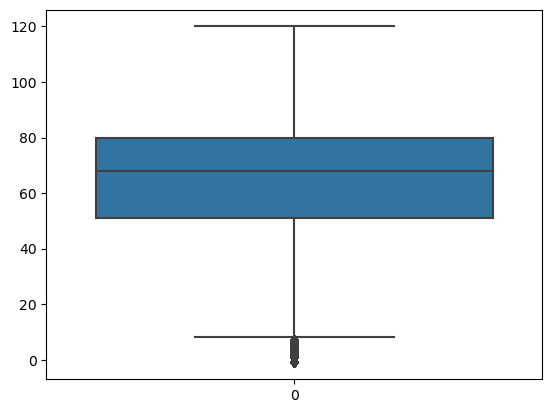

,game_event_id,game_id,club_id,player_id,minute,type,description
15,874987f117bca74599041037e0c43075,2211607,610,124883,-1,Cards,1. Yellow card
204,3aaa80875fbd40d6286c2ad811c81dd5,2221757,127,2198,-1,Cards,"1. Yellow card , Foul"
205,12332d376f646311d98f269f05f261db,2221757,127,2201,-1,Cards,"1. Yellow card , Dissent"
211,acd8bc16b3cefb8f03542964942a7379,2221757,10,39105,-1,Cards,"1. Yellow card , Foul"
215,5d52467708d6c25d619b6198c1b3681f,2221757,10,77879,-1,Cards,"1. Yellow card , Serious foul"
...,...,...,...,...,...,...,...
682533,5925101a849ed646d0b4e6b5a32cc7dc,4254174,430,413507,-1,Shootout,", Scored"
682536,bd8e5c5d3cd4aec16c3ad84fc9b8a800,4254174,1025,428563,-1,Shootout,", Scored"
682537,2eefe14a8ea444d87db77c7ea6a28736,4254174,1025,435648,-1,Shootout,", Scored"
682538,5041739de02bb1e59324feb7fabb6d4a,4254174,1025,502821,-1,Shootout,", Scored"


120

-1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\2826533575.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df['minute'] = events_df['minute'].replace(-1,1)


0

count    683511.000000
mean         63.529630
std          21.921999
min           1.000000
25%          51.000000
50%          68.000000
75%          80.000000
max         120.000000
Name: minute, dtype: float64

<Figure size 640x480 with 0 Axes>

In [44]:
# Inspect Minute Variable for Outlier Detection
sns.boxplot(data = events_df['minute'])
plt.show()
plt.clf()

# Further Inspection of Minute Variable [minutes less than 0]
minutes_less_zero = events_df[events_df['minute'] <= 0]
display(minutes_less_zero) # minute variable has value of -1 and this is an entry mistake
display(events_df['minute'].max()) # 120 minutes
display(events_df['minute'].min()) # -1 minutes

# Replace the -1 with +1 for the minute variable
events_df['minute'] = events_df['minute'].replace(-1,1)
display(len(events_df[events_df['minute'] <= 0]))

# Inspect Descriptive Statistics of Minute Variable
display(events_df['minute'].describe()) # Within an acceptable range (1,120)

###### 4.8 Inspect Categorical Variables and Null Values

In [45]:
# Check the null values for categorical variables
display(events_df[categorical_variables].isnull().sum())
# game_event_id         0
# type                  0
# description      337436 [Need further inspection]

# Inspect Description Variable
description_null = events_df[events_df['description'].isnull()]
display(description_null.head())
display(description_null['type'].value_counts())
# Substitutions    337436 [From the nulls]
# All the null values are for substitutions and have no descriptions
# For the descriptions that have null values replace the values with Not reported
display(events_df[events_df['type'] == 'Substitutions']['description'].value_counts())

# Replacement of null values in the description column
display(events_df['type'].value_counts())
events_df['description'] = events_df['description'].fillna(', Not reported') 
display(events_df[events_df['type'] == 'Substitutions']['description'].value_counts())
display(events_df[categorical_variables].isnull().sum()) # Successfully replaced null values

game_event_id         0
type                  0
description      337436
dtype: int64

,game_event_id,game_id,club_id,player_id,minute,type,description
26555,e4d512124476ec9412a40b6a5992ee2f,2235964,10468,121235,81,Substitutions,NaN
26557,ac641aeaaf272da2f7e39427fe5e03c8,2235964,10468,201284,66,Substitutions,NaN
28472,9e4d13d444aa9315f9fb56ef075faf23,2240152,1465,17352,81,Substitutions,NaN
28473,4bc0bb78995d14303a22390aeec4e601,2240152,1301,24880,62,Substitutions,NaN
28475,b08ec33cbbcb9be738f1525e8d09d4e1,2240152,1465,42303,65,Substitutions,NaN


Substitutions    337436
Name: type, dtype: int64

, Tactical                            44799
, Not reported                        40248
, Injury                               6076
, Delay                                 893
, Resting                               766
, Special achievements                  555
, Risk of booking                       300
, Substitution without replacement       52
Name: description, dtype: int64

Substitutions    431125
Goals            183940
Cards             67037
Shootout           1409
Name: type, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\4215383721.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df['description'] = events_df['description'].fillna(', Not reported')


, Not reported                        377684
, Tactical                             44799
, Injury                                6076
, Delay                                  893
, Resting                                766
, Special achievements                   555
, Risk of booking                        300
, Substitution without replacement        52
Name: description, dtype: int64

game_event_id    0
type             0
description      0
dtype: int64

###### 4.9 Extract Yellow and Red Cards From Descriptions Variable [Feature Engineering]

In [46]:
# Inspect the null values before feature extraction
display(events_df.isnull().sum()) # No null values 
display(events_df.shape) # (683511, 7)
#display(events_df.head())

# Extract yellow and red cards from the description variable to create 2 new variables
# Check the string of red and yellow cards from the description
#display(events_df[events_df['type'] == 'Cards'].head(10)) # Yellow card, Red card

events_df['yellow_card'] = events_df['description'].apply(lambda x: 1 if 'Yellow card' in x else 0)
events_df['red_card'] = events_df['description'].apply(lambda x: 1 if 'Red card' in x else 0)
#display(events_df['yellow_card'].value_counts())
#display(events_df['red_card'].value_counts())
        
# Drop the description variable from the game events data frame as feature extraction is complete
events_df = events_df.drop('description', axis=1)
display(events_df.shape)
display(events_df.head())

game_event_id    0
game_id          0
club_id          0
player_id        0
minute           0
type             0
description      0
dtype: int64

(683511, 7)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\897546559.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df['yellow_card'] = events_df['description'].apply(lambda x: 1 if 'Yellow card' in x else 0)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\897546559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df['red_card'] = events_df['description'].apply(lambda x: 1 if 'Red card' in x else 0)


(683511, 8)

,game_event_id,game_id,club_id,player_id,minute,type,yellow_card,red_card
0,2f41da30c471492e7d4a984951671677,2211607,610,4425,77,Cards,1,0
1,a72f7186d132775f234d3e2f7bc0ed5b,2211607,383,33210,77,Cards,1,0
2,b2d721eaed4692a5c59a92323689ef18,2211607,383,36500,3,Goals,0,0
3,aef768899cedac0c9a650980219075a2,2211607,383,36500,53,Goals,0,0
4,5d6d9533023057b6619ecd145a038bbe,2211607,383,36500,74,Substitutions,0,0


###### 4.10 Inspect Cleaned Game Events Data Frame 

In [47]:
display(events_df.isnull().sum()) 
# No reported null values and the game events data frame is ready for merging.
display(events_df.shape) # (683511, 8)
#display(events_df.describe(include = "all"))
display(events_df.head())

game_event_id    0
game_id          0
club_id          0
player_id        0
minute           0
type             0
yellow_card      0
red_card         0
dtype: int64

(683511, 8)

,game_event_id,game_id,club_id,player_id,minute,type,yellow_card,red_card
0,2f41da30c471492e7d4a984951671677,2211607,610,4425,77,Cards,1,0
1,a72f7186d132775f234d3e2f7bc0ed5b,2211607,383,33210,77,Cards,1,0
2,b2d721eaed4692a5c59a92323689ef18,2211607,383,36500,3,Goals,0,0
3,aef768899cedac0c9a650980219075a2,2211607,383,36500,53,Goals,0,0
4,5d6d9533023057b6619ecd145a038bbe,2211607,383,36500,74,Substitutions,0,0


###### 5 -- PLAYERS DATA FRAME [players.csv]

###### 5.1 Load the players csv file and convert it into a data frame 

In [48]:
players_data = pd.read_csv('../1. Input/players.csv')
display(players_data.head())
display(players_data.columns)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

###### 5.2 Inspect the Data Frame

In [49]:
display(players_data.shape) # (30419, 23)
#display(players_data.dtypes)
display(players_data.nunique())

(30419, 23)

player_id                               30419
first_name                               6573
last_name                               22386
name                                    29771
last_season                                12
current_club_id                           424
player_code                             29733
country_of_birth                          183
city_of_birth                            8214
country_of_citizenship                    181
date_of_birth                            8912
sub_position                               13
position                                    5
foot                                        3
height_in_cm                               50
contract_expiration_date                  103
agent_name                               2664
image_url                               24860
url                                     30419
current_club_domestic_competition_id       14
current_club_name                         424
market_value_in_eur               

###### 5.3 Descriptive Statistics

In [50]:
display(players_data.describe(include = "all"))

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
count,3.041900e+04,28439,30419,30419,30419.000000,30419.000000,30419,27723,28229,29859,...,28043,28335.000000,18968,15067,30419,30419,30419,30419,2.929700e+04,2.929700e+04
unique,NaN,6573,22386,29771,NaN,NaN,29733,183,8214,181,...,3,NaN,103,2664,24860,30419,14,424,NaN,NaN
top,NaN,David,García,Paulinho,NaN,NaN,paulinho,France,London,Turkey,...,right,NaN,2024-06-30 00:00:00,Wasserman,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Kilmarnock Football Club,NaN,NaN
freq,NaN,201,61,12,NaN,NaN,12,2189,436,1836,...,19676,NaN,5146,433,5560,1,2991,180,NaN,NaN
mean,3.130137e+05,NaN,NaN,NaN,2018.782208,4398.548670,NaN,NaN,NaN,NaN,...,NaN,182.248068,NaN,NaN,NaN,NaN,NaN,NaN,1.572947e+06,3.639672e+06
std,2.518691e+05,NaN,NaN,NaN,3.653036,10108.956926,NaN,NaN,NaN,NaN,...,NaN,6.841311,NaN,NaN,NaN,NaN,NaN,NaN,6.158944e+06,9.471887e+06
min,1.000000e+01,NaN,NaN,NaN,2012.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,1.000000e+04
25%,9.573100e+04,NaN,NaN,NaN,2016.000000,403.000000,NaN,NaN,NaN,NaN,...,NaN,178.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+05,2.750000e+05
50%,2.585200e+05,NaN,NaN,NaN,2020.000000,1075.000000,NaN,NaN,NaN,NaN,...,NaN,182.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.500000e+05,8.000000e+05
75%,4.682390e+05,NaN,NaN,NaN,2022.000000,3057.000000,NaN,NaN,NaN,NaN,...,NaN,187.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.500000e+05,2.800000e+06


###### 5.4 Select the desired variables from the players data frame and save it as players_df

In [51]:
players_df = players_data[["player_id","current_club_id","current_club_domestic_competition_id","height_in_cm","market_value_in_eur","highest_market_value_in_eur"]]
display(players_df.head())
display(players_df.shape) # (30419, 6)

,player_id,current_club_id,current_club_domestic_competition_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
0,10,398,IT1,184.0,1000000.0,30000000.0
1,26,16,L1,190.0,750000.0,8000000.0
2,65,1091,GR1,NaN,1000000.0,34500000.0
3,77,506,IT1,NaN,200000.0,24500000.0
4,80,27,L1,194.0,100000.0,3000000.0


(30419, 6)

###### 5.5 Understand the Numerical, Categorical and Binary Variables

In [52]:
# Create lists to hold the names of each type of column
numerical_variables = []
categorical_variables = []
binary_variables = []

# Loop through the games_df columns to classify them
for column_name in players_df.columns:
    unique_vals = players_df[column_name].nunique()
    
    # Check for Binary
    if (players_df[column_name].dtype in ['int64', 'float64', 'bool']) and (unique_vals == 2):
        binary_variables.append(column_name)
    # Check for Numerical
    elif players_df[column_name].dtype in ['int64', 'float64']:
        numerical_variables.append(column_name)
    # Check for Categorical
    elif players_df[column_name].dtype == 'object' or players_df[column_name].dtype.name == 'category':
        categorical_variables.append(column_name)

print("Numerical Variables:", numerical_variables)
print("Categorical Variables:", categorical_variables)
print("Binary Variables:", binary_variables)

print("Total Numerical Variables: ",len(numerical_variables))
print("Total Categorical Variables: ",len(categorical_variables))
print("Total Binary Variables: ",len(binary_variables))

Numerical Variables: ['player_id', 'current_club_id', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur']
Categorical Variables: ['current_club_domestic_competition_id']
Binary Variables: []
Total Numerical Variables:  5
Total Categorical Variables:  1
Total Binary Variables:  0


###### 5.6 Inspect and Address Null Values

In [53]:
# Examine null values
display(players_df[numerical_variables].isnull().sum())
# height_in_cm                   2084 [Needs further inspection]
# market_value_in_eur            1122 [Needs further inspection]
# highest_market_value_in_eur    1122 [Needs further inspection]

# Addressing null values in height_in_cm
height_null_vals = players_df[players_df["height_in_cm"].isnull()]
display(height_null_vals.head())

# Impute average height by current_club_id for the height_in_cm variable
height_by_club_id = players_df.groupby('current_club_id')['height_in_cm'].transform('mean')
players_df['height_in_cm'] = players_df['height_in_cm'].fillna(height_by_club_id)

# Addressing null values for market_value_in_eur and highest_market_value_in_eur similarly
market_val_by_club_id = players_df.groupby('current_club_id')['market_value_in_eur'].transform('mean')
players_df['market_value_in_eur'] = players_df['market_value_in_eur'].fillna(market_val_by_club_id)

highest_val_by_club_id = players_df.groupby('current_club_id')['highest_market_value_in_eur'].transform('mean')
players_df['highest_market_value_in_eur'] = players_df['highest_market_value_in_eur'].fillna(highest_val_by_club_id)

# Check if the imputation was successfull
display(players_df[numerical_variables].isnull().sum())

player_id                         0
current_club_id                   0
height_in_cm                   2084
market_value_in_eur            1122
highest_market_value_in_eur    1122
dtype: int64

,player_id,current_club_id,current_club_domestic_competition_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
2,65,1091,GR1,NaN,1000000.0,34500000.0
3,77,506,IT1,NaN,200000.0,24500000.0
5,109,825,TR1,NaN,400000.0,9500000.0
6,123,33,L1,NaN,1500000.0,9500000.0
12,276,20100,DK1,NaN,200000.0,500000.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\1021736910.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['height_in_cm'] = players_df['height_in_cm'].fillna(height_by_club_id)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\1021736910.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_df['market_value_in_eur'] = players_df['market_value_in_eur'].fillna(market_val_by_club_id)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\1021736910.py:20: SettingWithCopyWarning: 
A valu

player_id                      0
current_club_id                0
height_in_cm                   0
market_value_in_eur            0
highest_market_value_in_eur    0
dtype: int64

###### 5.7 Inspect and Address Extreme Values

,player_id,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
count,3.041900e+04,30419.000000,30419.000000,3.041900e+04,3.041900e+04
mean,3.130137e+05,4398.548670,182.254297,1.566868e+06,3.617803e+06
std,2.518691e+05,10108.956926,6.610099,6.069086e+06,9.341005e+06
min,1.000000e+01,3.000000,18.000000,1.000000e+04,1.000000e+04
25%,9.573100e+04,403.000000,178.000000,1.000000e+05,3.000000e+05
50%,2.585200e+05,1075.000000,182.224138,2.500000e+05,8.000000e+05
75%,4.682390e+05,3057.000000,187.000000,6.500000e+05,2.879342e+06
max,1.225269e+06,83678.000000,207.000000,1.800000e+08,2.000000e+08


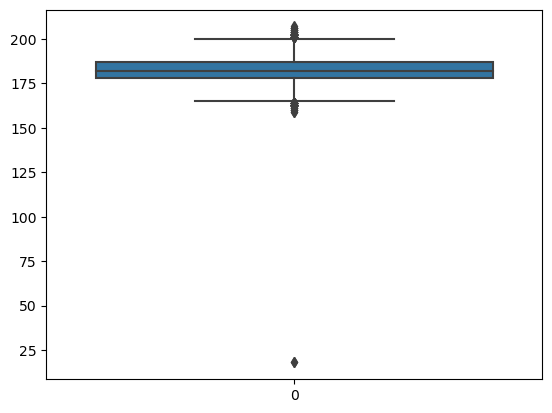

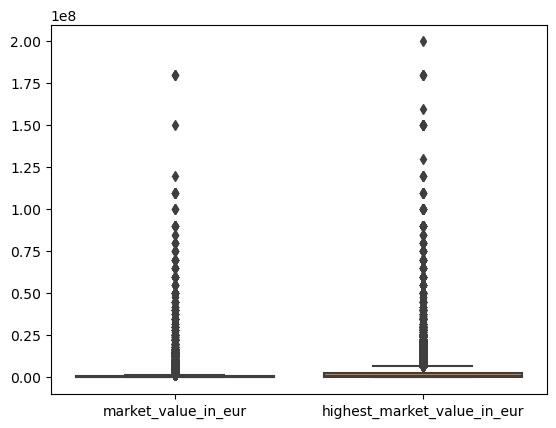

,player_id,current_club_id,current_club_domestic_competition_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur
25616,592398,40,FR1,18.0,150000.0,150000.0
26481,628490,2687,ES1,18.0,150000.0,150000.0


(30419, 6)

(30417, 6)

market value range: 10000.0 180000000.0


<Figure size 640x480 with 0 Axes>

In [54]:
# Examine extreme values
display(players_df[numerical_variables].describe(include = 'all'))

sns.boxplot(data = players_df['height_in_cm'])
plt.show()
plt.clf()

sns.boxplot(data = players_df[['market_value_in_eur','highest_market_value_in_eur']])
plt.show()
plt.clf()

# Inpsect the height_in_cm (height cannot be lower than 25 cm)
# The average height of players is around 182.25 cm

heights_outlier = players_df[players_df['height_in_cm'] < 25]
display(heights_outlier)
display(players_df.shape) # Back track the rows before removal of the outlier

# Remove the outlier from the players data frame
players_df = players_df[~(players_df['height_in_cm'] < 25)]
display(players_df.shape) # Check if the outlier has been removed from the data frame
# Successfully removed the outlier

# Inpsect the market_value_in_eur 
market_value_min = np.min(players_df['market_value_in_eur'])
market_value_max = np.max(players_df['market_value_in_eur'])
print('market value range:',market_value_min,market_value_max)
# Some players are valued lower at the start of the career or depriciated in value overtime while 
# based on seasonal/consistence performance some players are valued extremely high. Therefore,
# it is not required for extreme low/high values to be removed from the data frame.

###### 5.8 Address Average Height Variable And Inspect The Final Players Data Frame

In [55]:
# Determine average height based on current club id
players_df['average_height'] = players_df.groupby('current_club_id')['height_in_cm'].transform('mean')
#players_df.head()

# Determine average market value based on current club id
players_df['average_market_value'] = players_df.groupby('current_club_id')['market_value_in_eur'].transform('mean')
#players_df.head()

# Final Data Frame For Players
players_df = players_df[['player_id','current_club_id','current_club_domestic_competition_id','average_height','average_market_value']]
players_df.head()

,player_id,current_club_id,current_club_domestic_competition_id,average_height,average_market_value
0,10,398,IT1,182.330357,2.509298e+06
1,26,16,L1,184.600000,7.843077e+06
2,65,1091,GR1,181.173469,1.153866e+06
3,77,506,IT1,183.770115,5.494278e+06
4,80,27,L1,184.446154,1.537425e+07


###### 5.9 Inspect The Cleaned Players Data Frame

In [56]:
display(players_df.isnull().sum()) # No null values reported 
#display(players_df.describe(include = "all"))
display(players_df.dtypes)
display(players_df.shape)
display(players_df.head())

player_id                               0
current_club_id                         0
current_club_domestic_competition_id    0
average_height                          0
average_market_value                    0
dtype: int64

player_id                                 int64
current_club_id                           int64
current_club_domestic_competition_id     object
average_height                          float64
average_market_value                    float64
dtype: object

(30417, 5)

,player_id,current_club_id,current_club_domestic_competition_id,average_height,average_market_value
0,10,398,IT1,182.330357,2.509298e+06
1,26,16,L1,184.600000,7.843077e+06
2,65,1091,GR1,181.173469,1.153866e+06
3,77,506,IT1,183.770115,5.494278e+06
4,80,27,L1,184.446154,1.537425e+07


###### 6 -- APPEARANCES DATA FRAME [appearances.csv]

###### 6.1 Load the appearances csv file and convert into a dataframe

In [57]:
appearances_data = pd.read_csv('../1. Input/appearances.csv')
display(appearances_data.head())
display(appearances_data.shape)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


(1527494, 13)

###### 6.2 Select the desired variables and save it as appearances_df

In [58]:
appearances_df = appearances_data[['appearance_id','game_id','player_id','player_club_id','player_current_club_id','competition_id','assists','goals']]
display(appearances_df.shape)
display(appearances_df.head())

(1527494, 8)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,competition_id,assists,goals
0,2231978_38004,2231978,38004,853,235,CLQ,0,2
1,2233748_79232,2233748,79232,8841,2698,ELQ,0,0
2,2234413_42792,2234413,42792,6251,465,ELQ,0,0
3,2234418_73333,2234418,73333,1274,6646,ELQ,0,0
4,2234421_122011,2234421,122011,195,3008,ELQ,1,0


###### 6.3 Understand the Numerical, Categorical and Binary Variables

In [59]:
# Create lists to hold the names of each type of column
numerical_variables = []
categorical_variables = []
binary_variables = []

# Loop through the games_df columns to classify them
for column_name in appearances_df.columns:
    unique_vals = appearances_df[column_name].nunique()
    
    # Check for Binary
    if (appearances_df[column_name].dtype in ['int64', 'float64', 'bool']) and (unique_vals == 2):
        binary_variables.append(column_name)
    # Check for Numerical
    elif appearances_df[column_name].dtype in ['int64', 'float64']:
        numerical_variables.append(column_name)
    # Check for Categorical
    elif appearances_df[column_name].dtype == 'object' or appearances_df[column_name].dtype.name == 'category':
        categorical_variables.append(column_name)

print("Numerical Variables:", numerical_variables)
print("Categorical Variables:", categorical_variables)
print("Binary Variables:", binary_variables)

print("Total Numerical Variables: ",len(numerical_variables))
print("Total Categorical Variables: ",len(categorical_variables))
print("Total Binary Variables: ",len(binary_variables))

Numerical Variables: ['game_id', 'player_id', 'player_club_id', 'player_current_club_id', 'assists', 'goals']
Categorical Variables: ['appearance_id', 'competition_id']
Binary Variables: []
Total Numerical Variables:  6
Total Categorical Variables:  2
Total Binary Variables:  0


###### 6.4 Inspect Null And Extreme Values For Numerical Variables

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
competition_id            0
assists                   0
goals                     0
dtype: int64

,assists,goals
count,1.527494e+06,1.527494e+06
mean,7.588573e-02,9.629956e-02
std,2.864527e-01,3.316974e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,6.000000e+00,6.000000e+00


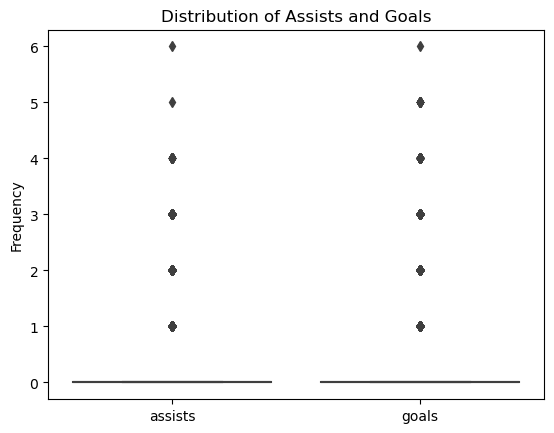

In [60]:
# Check for null values in numerical variables
display(appearances_df.isnull().sum()) # No null values reported
display(appearances_df[['assists','goals']].describe(include = "all"))

# Check for extreme values in assists/goals
sns.boxplot(data = appearances_df[['assists', 'goals']])
plt.title('Distribution of Assists and Goals')
plt.ylabel('Frequency')
plt.show()
# No extreme values reported quiet consistent across with the goals variable and does not require any
# measurement or treatment.

###### 6.5 Final Inspection Of Appearances Data Frame

In [61]:
display(appearances_df[categorical_variables].isnull().sum()) # No null values reported 
# The appearances data frame seems to be a cleaned data frame and is ready for merging
display(appearances_df.shape)
display(appearances_df.head())

appearance_id     0
competition_id    0
dtype: int64

(1527494, 8)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,competition_id,assists,goals
0,2231978_38004,2231978,38004,853,235,CLQ,0,2
1,2233748_79232,2233748,79232,8841,2698,ELQ,0,0
2,2234413_42792,2234413,42792,6251,465,ELQ,0,0
3,2234418_73333,2234418,73333,1274,6646,ELQ,0,0
4,2234421_122011,2234421,122011,195,3008,ELQ,1,0


###### 7 -- DEVELOP THE MASTER DATA FRAME

###### 7.1 Write the cleaned data frames to csv files to create the master file

In [62]:
# Create data frame clones and write it to a csv file [preserve originals]

games_cleaned = games_df.copy()
games_cleaned.to_csv(r"../4. Outputs/games_csv.csv",index = False)

clubs_cleaned = clubs_df.copy()
clubs_cleaned.to_csv(r"../4. Outputs/clubs_csv.csv",index = False)

competitions_cleaned = competitions_df.copy()
competitions_cleaned.to_csv(r"../4. Outputs/competitions_csv.csv",index = False)

events_cleaned = events_df.copy()
events_cleaned.to_csv(r"../4. Outputs/events_csv.csv",index = False)

players_cleaned = players_df.copy()
players_cleaned.to_csv(r"../4. Outputs/players_csv.csv",index = False)

appearances_cleaned = appearances_df.copy()
appearances_cleaned.to_csv(r"../4. Outputs/appearances_csv.csv",index = False)

###### 7.2 Preliminary Inspection Of Cleaned Data Frames Before Merge [Observations / Variable Count]

In [63]:
print("Games Data Frame : Observations / Variables",games_cleaned.shape)
print("Clubs Data Frame : Observations / Variables",clubs_cleaned.shape)
print("Competitions Data Frame : Observations / Variables",competitions_cleaned.shape)
print("Events Data Frame : Observations / Variables",events_cleaned.shape)
print("Players Data Frame : Observations / Variables",players_cleaned.shape)
print("Appearances Data Frame : Observations / Variables",appearances_cleaned.shape)

Games Data Frame : Observations / Variables (46546, 19)
Clubs Data Frame : Observations / Variables (426, 5)
Competitions Data Frame : Observations / Variables (14, 3)
Events Data Frame : Observations / Variables (683511, 8)
Players Data Frame : Observations / Variables (30417, 5)
Appearances Data Frame : Observations / Variables (1527494, 8)


###### 7.3 Master Data Frame Creation -- Process

###### 7.3.1 Primary Merge : Merge The Games And Clubs Data Frame

In [64]:
merged_home = pd.merge(games_cleaned,clubs_cleaned,left_on = 'home_club_id',right_on = 'club_id',how = 'left',suffixes = ('', '_home'))
merged_full = pd.merge(merged_home,clubs_cleaned,left_on = 'away_club_id',right_on = 'club_id',how = 'left',suffixes = ('', '_away'))
print(f"After merging Games and Clubs Data Frame : {merged_full.shape[0]} rows, {merged_full.shape[1]} columns")

After merging Games and Clubs Data Frame : 46546 rows, 29 columns


###### 7.3.2 Second Merge : Merge With Competitions Data Frame

In [65]:
merged_with_competitions = pd.merge(merged_full,competitions_cleaned,on = 'competition_id',how = 'left')
print(f"After merging with Competitions Data Frame : {merged_with_competitions.shape[0]} rows, {merged_with_competitions.shape[1]} columns")

After merging with Competitions Data Frame : 46546 rows, 31 columns


###### 7.3.3 Third Merge : Merge With Aggregated Events

In [66]:
events_aggregated = events_cleaned.groupby('game_id').agg(
    total_yellow_cards=('yellow_card', 'sum'),
    total_red_cards=('red_card', 'sum')
).reset_index()

merged_with_event_summaries = pd.merge(merged_with_competitions,events_aggregated,on = 'game_id',how = 'left')
print(f"After merging with Aggregated Events : {merged_with_event_summaries.shape[0]} rows, {merged_with_event_summaries.shape[1]} columns")

After merging with Aggregated Events : 46546 rows, 33 columns


###### 7.3.4 Fourth Merge : Merge With Aggregated Player Statistics

In [67]:
player_club_aggregates = players_cleaned.groupby('current_club_id').agg(
    average_height_per_club=('average_height', 'mean'),
    average_market_value_per_club=('average_market_value', 'mean')
).reset_index()

player_club_aggregates_home = player_club_aggregates.rename(columns={
    'current_club_id': 'home_club_id',
    'average_height_per_club': 'average_height_home_club',
    'average_market_value_per_club': 'average_market_value_home_club'
})

player_club_aggregates_away = player_club_aggregates.rename(columns={
    'current_club_id': 'away_club_id',
    'average_height_per_club': 'average_height_away_club',
    'average_market_value_per_club': 'average_market_value_away_club'
})
# Merge With Home Club Aggregates
merged_with_home_club_aggregates = pd.merge(merged_with_event_summaries,player_club_aggregates_home,on = 'home_club_id',how = 'left')

# Merge With Away Club Aggregates
merged_with_club_aggregates = pd.merge(merged_with_home_club_aggregates,player_club_aggregates_away,on = 'away_club_id',how = 'left')

print(f"After merging with Player Aggregates : {merged_with_club_aggregates.shape[0]} rows, {merged_with_club_aggregates.shape[1]} columns")

After merging with Player Aggregates : 46546 rows, 37 columns


###### 7.3.5 Final Merge : Merge With Aggregated Appearance Statistics

In [68]:
appearances_aggregated = appearances_cleaned.groupby('game_id').agg(
    total_assists=('assists', 'sum'),
    total_goals=('goals', 'sum')
).reset_index()

merged_with_appearance_aggregates = pd.merge(merged_with_club_aggregates,appearances_aggregated,on = 'game_id',how = 'left')
print(f"After merging with Aggregated Appearance Statistics : {merged_with_appearance_aggregates.shape[0]} rows, {merged_with_appearance_aggregates.shape[1]} columns")

After merging with Aggregated Appearance Statistics : 46546 rows, 39 columns


###### 7.3.6 Master Data Frame : Domestic League Competitions

In [69]:
master_df = merged_with_appearance_aggregates.copy()
display(master_df.shape)
display(master_df.head())

# Write the master data frame to csv file
master_df.to_csv(r"../4. Outputs/master_csv.csv",index = False)

(46546, 39)

,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,name,country_name,total_yellow_cards,total_red_cards,average_height_home_club,average_market_value_home_club,average_height_away_club,average_market_value_away_club,total_assists,total_goals
0,2321044,L1,2013,2013-08-18,16,23,2,1,1,15,...,bundesliga,Germany,1.0,0.0,184.600000,7.843077e+06,182.15000,1.666667e+05,3.0,3.0
1,2321060,L1,2013,2013-08-25,23,24,0,2,18,11,...,bundesliga,Germany,3.0,0.0,182.150000,1.666667e+05,183.53271,2.441609e+06,1.0,2.0
2,2321086,L1,2013,2013-09-21,4,16,1,1,15,1,...,bundesliga,Germany,3.0,0.0,182.187500,3.324324e+05,184.60000,7.843077e+06,1.0,2.0
3,2321152,L1,2013,2013-11-02,44,33,0,2,7,6,...,bundesliga,Germany,4.0,0.0,184.031250,5.526812e+05,185.37931,5.754167e+05,2.0,2.0
4,2321205,L1,2013,2013-12-21,41,39,2,3,14,9,...,bundesliga,Germany,3.0,0.0,182.888889,4.302632e+05,184.12987,1.580357e+06,5.0,5.0


###### 8 -- Master Data Frame : Data Preprocessing & Cleaning

###### 8.1 Inspect The Master Data Frame

In [70]:
#display(master_df.describe(include="all",datetime_is_numeric = True))
display(master_df.nunique())

game_id                           46546
competition_id                       14
season                               12
date                               2585
home_club_id                        426
away_club_id                        426
home_club_goals                      11
away_club_goals                      11
home_club_position                   21
away_club_position                   21
stadium                             511
attendance                        23427
home_club_formation                  36
away_club_formation                  35
home_club_name                      426
away_club_name                      426
competition_type                      1
home_club_strategy                    3
away_club_strategy                    3
club_id                             426
domestic_competition_id              14
average_age                          77
stadium_seats                       380
net_transfer_record                 276
club_id_away                        426


###### 8.2 Understand the Numerical, Categorical and Binary Variables

In [71]:
# Create lists to hold the names of each type of column
numerical_variables = []
categorical_variables = []
binary_variables = []

# Loop through the master_df columns to classify them
for column_name in master_df.columns:
    unique_vals = master_df[column_name].nunique()
    data_type = master_df[column_name].dtype
    
    # Check for Binary
    if unique_vals == 2 and data_type in ['int64', 'float64', 'bool']:
        binary_variables.append(column_name)
    
    # Check for Numerical
    elif data_type in ['int64', 'float64', 'int32', 'float32', 'int16', 'float16']:
        numerical_variables.append(column_name)
    
    # Check for Categorical
    elif data_type in ['object', 'category', 'int8', 'uint8']:
        categorical_variables.append(column_name)

print("Numerical Variables:", numerical_variables)
print("Categorical Variables:", categorical_variables)
print("Binary Variables:", binary_variables)

print("Total Number Of Numerical Variables:", len(numerical_variables))
print("Total Number Of Categorical Variables:", len(categorical_variables))
print("Total Number Of Binary Variables:", len(binary_variables))

Numerical Variables: ['game_id', 'season', 'home_club_id', 'away_club_id', 'home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position', 'attendance', 'club_id', 'average_age', 'stadium_seats', 'net_transfer_record', 'club_id_away', 'average_age_away', 'stadium_seats_away', 'net_transfer_record_away', 'total_yellow_cards', 'total_red_cards', 'average_height_home_club', 'average_market_value_home_club', 'average_height_away_club', 'average_market_value_away_club', 'total_assists', 'total_goals']
Categorical Variables: ['competition_id', 'stadium', 'home_club_formation', 'away_club_formation', 'home_club_name', 'away_club_name', 'competition_type', 'home_club_strategy', 'away_club_strategy', 'domestic_competition_id', 'domestic_competition_id_away', 'name', 'country_name']
Binary Variables: []
Total Number Of Numerical Variables: 25
Total Number Of Categorical Variables: 13
Total Number Of Binary Variables: 0


###### 8.3 Inspect Null Values For Numerical Variables

In [72]:
display(master_df[numerical_variables].isnull().sum())

# total_yellow_cards                81 [Needs further assessment]
# total_red_cards                   81 [Needs further assessment]
# average_height_home_club          33 [Needs further assessment]
# average_market_value_home_club    33 [Needs further assessment]
# average_height_away_club          34 [Needs further assessment]
# average_market_value_away_club    34 [Needs further assessment]
# total_assists                     80 [Needs further assessment]
# total_goals                       80 [Needs further assessment]

game_id                            0
season                             0
home_club_id                       0
away_club_id                       0
home_club_goals                    0
away_club_goals                    0
home_club_position                 0
away_club_position                 0
attendance                         0
club_id                            0
average_age                        0
stadium_seats                      0
net_transfer_record                0
club_id_away                       0
average_age_away                   0
stadium_seats_away                 0
net_transfer_record_away           0
total_yellow_cards                81
total_red_cards                   81
average_height_home_club          33
average_market_value_home_club    33
average_height_away_club          34
average_market_value_away_club    34
total_assists                     80
total_goals                       80
dtype: int64

###### 8.4 KNN (K - Nearest Neighbours Imputation Technique) [Numerical Variables : Null Values]

In [73]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
desired_variables = [
    'total_yellow_cards', 
    'total_red_cards', 
    'average_height_home_club',
    'average_height_away_club', 
    'average_market_value_home_club',
    'average_market_value_away_club', 
    'total_assists', 
    'total_goals'
]

master_df[desired_variables] = knn_imputer.fit_transform(master_df[desired_variables])
display(master_df[numerical_variables].isnull().sum()) # Null Values Imputed Successfully

game_id                           0
season                            0
home_club_id                      0
away_club_id                      0
home_club_goals                   0
away_club_goals                   0
home_club_position                0
away_club_position                0
attendance                        0
club_id                           0
average_age                       0
stadium_seats                     0
net_transfer_record               0
club_id_away                      0
average_age_away                  0
stadium_seats_away                0
net_transfer_record_away          0
total_yellow_cards                0
total_red_cards                   0
average_height_home_club          0
average_market_value_home_club    0
average_height_away_club          0
average_market_value_away_club    0
total_assists                     0
total_goals                       0
dtype: int64

###### 8.5 Inspect Extreme Values For Numerical Variables

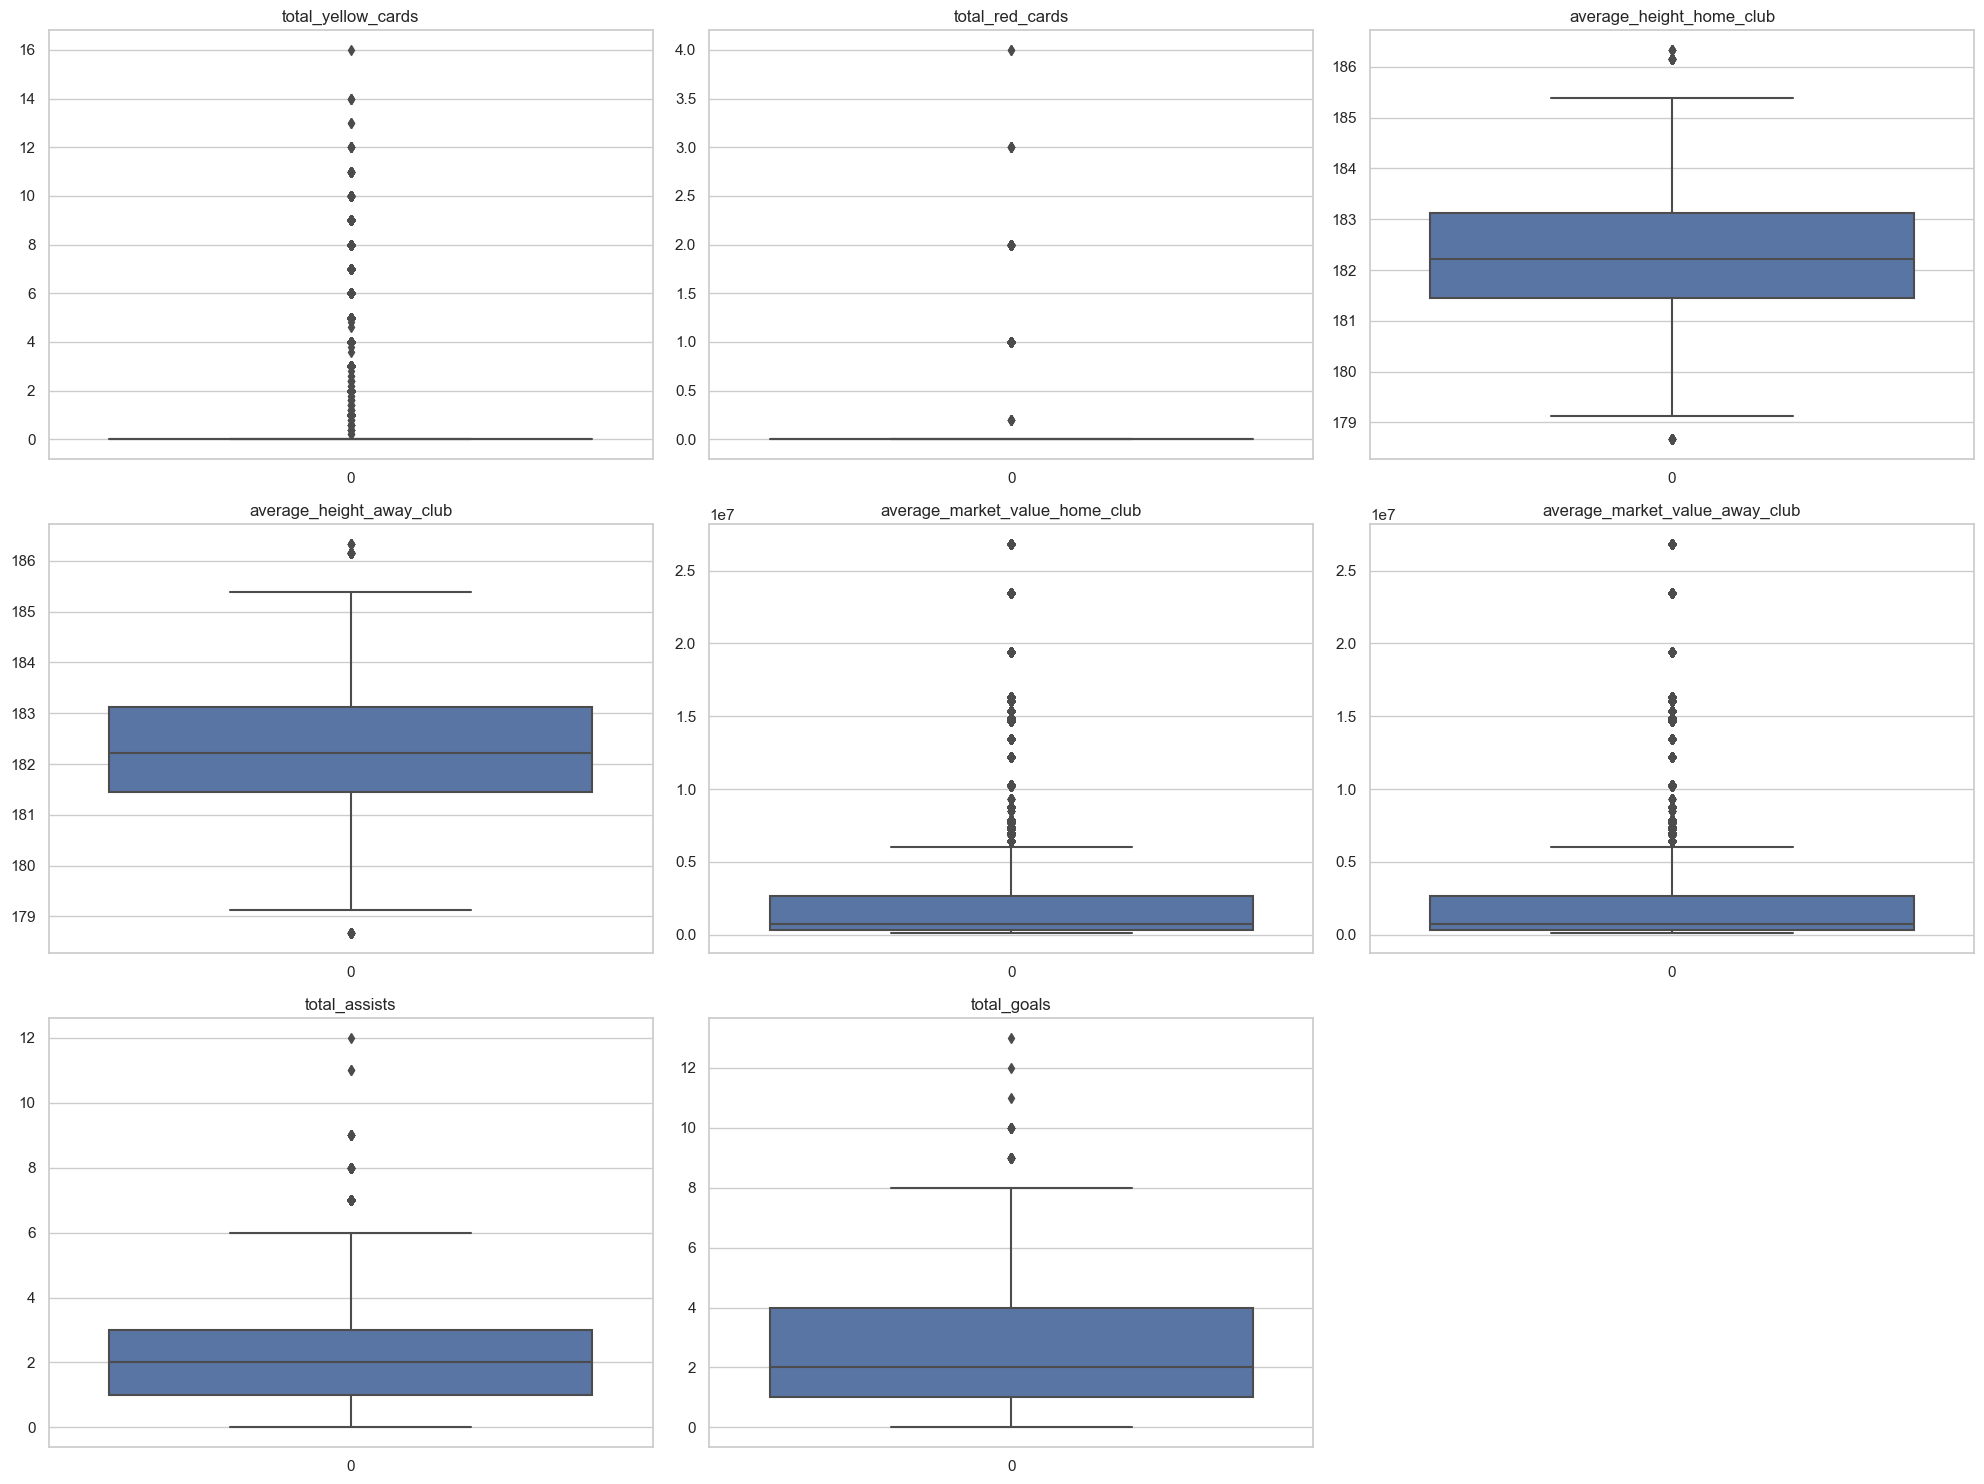

<Figure size 640x480 with 0 Axes>

In [74]:
# Set the aesthetics for the plots
sns.set(style = "whitegrid")

# List of numerical columns to plot
numerical_columns = ['total_yellow_cards', 'total_red_cards', 
                     'average_height_home_club', 'average_height_away_club', 
                     'average_market_value_home_club', 'average_market_value_away_club', 
                     'total_assists', 'total_goals']

# Plotting box plots for each numerical column
plt.figure(figsize=(20, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data = master_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()
plt.clf()

###### 8.6 Analysis and Findings Regarding Outliers

###### Total Yellow Cards and Total Red Cards
Both variables exhibit a significant number of outliers beyond the upper whiskers. This suggests that while most matches have few or no cards, there are matches with unusually high numbers of yellow and red cards, which could be due to particularly aggressive play or contentious matches.

###### Average Height (Home and Away Clubs)
The outliers in average height for both home and away clubs are minimal. The distribution appears quite tight around the median, indicating that most teams have similar average heights. The few outliers present might indicate teams with unusually tall or short players, but these deviations are not extreme.

###### Average Market Value (Home and Away Clubs)
There's a wide range of values with a significant number of outliers on the higher end for both home and away clubs. This indicates that while many clubs have moderate market values, there are several clubs with exceptionally high market values, possibly reflecting elite clubs with more valuable players.

###### Total Assists and Total Goals
Similar to the yellow and red cards, these variables have a considerable amount of data points considered outliers beyond the upper whiskers. This indicates matches with unusually high numbers of assists and goals, which could be due to one-sided matches or particularly effective offensive play.

###### 8.7 Inspect Null Values For Categorical Variables

In [75]:
display(master_df[categorical_variables].isnull().sum()) # No Null Values Reported

competition_id                  0
stadium                         0
home_club_formation             0
away_club_formation             0
home_club_name                  0
away_club_name                  0
competition_type                0
home_club_strategy              0
away_club_strategy              0
domestic_competition_id         0
domestic_competition_id_away    0
name                            0
country_name                    0
dtype: int64

###### 8.8 Inspect The Cleaned Master Data Frame and Convert to a CSV File

In [76]:
#display(master_df.isnull().sum())
display(master_df.shape)
display(master_df.head())
#display(master_df.dtypes)

# Write the master cleaned data frame to csv file
master_cleaned = master_df.copy()
master_cleaned.to_csv(r"../4. Outputs/Cleaned Master Data File/master_cleaned_csv.csv", index=False)

(46546, 39)

,game_id,competition_id,season,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,...,name,country_name,total_yellow_cards,total_red_cards,average_height_home_club,average_market_value_home_club,average_height_away_club,average_market_value_away_club,total_assists,total_goals
0,2321044,L1,2013,2013-08-18,16,23,2,1,1,15,...,bundesliga,Germany,1.0,0.0,184.600000,7.843077e+06,182.15000,1.666667e+05,3.0,3.0
1,2321060,L1,2013,2013-08-25,23,24,0,2,18,11,...,bundesliga,Germany,3.0,0.0,182.150000,1.666667e+05,183.53271,2.441609e+06,1.0,2.0
2,2321086,L1,2013,2013-09-21,4,16,1,1,15,1,...,bundesliga,Germany,3.0,0.0,182.187500,3.324324e+05,184.60000,7.843077e+06,1.0,2.0
3,2321152,L1,2013,2013-11-02,44,33,0,2,7,6,...,bundesliga,Germany,4.0,0.0,184.031250,5.526812e+05,185.37931,5.754167e+05,2.0,2.0
4,2321205,L1,2013,2013-12-21,41,39,2,3,14,9,...,bundesliga,Germany,3.0,0.0,182.888889,4.302632e+05,184.12987,1.580357e+06,5.0,5.0
